## Coding Exercise #0512

In [1]:
import numpy as np
import warnings
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition  import TruncatedSVD
warnings.filterwarnings('ignore')

### 1. Latent Semantic Analysis (LSA):

In [2]:
# The data.
my_docs = ["The economic slowdown is becoming more severe",
           "The movie was simply awesome",
           "I like cooking my own food",
           "Samsung is announcing a new technology",
           "Machine Learning is an example of awesome technology",
           "All of us were excited at the movie",
           "We have to do more to reverse the economic slowdown"]

#### 1.1. Create a TF IDF representation:
TfidfVectorizer() arguments: <br>
- *max_features* : maximum number of features (distict words). <br>
- *min_df* : The minimum DF. Integer value means count and real number (0~1) means proportion. <br>
- *max_df* : The maximum DF. Integer value means count and real number (0~1) means proportion. Helps to filter out the stop words. <br>

In [3]:
my_docs = [x.lower() for x in my_docs]

In [4]:
my_docs

['the economic slowdown is becoming more severe',
 'the movie was simply awesome',
 'i like cooking my own food',
 'samsung is announcing a new technology',
 'machine learning is an example of awesome technology',
 'all of us were excited at the movie',
 'we have to do more to reverse the economic slowdown']

In [5]:
my_stop_words = ['us', 'like']

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
vectorizer = TfidfVectorizer(max_features = 15, min_df = 1, max_df = 3, stop_words = stopwords.words('english') + my_stop_words)
X = vectorizer.fit_transform(my_docs).toarray()

In [8]:
# Size of X (=m x n). m = number of documents = 7 & n = number of features.
X.shape

(7, 15)

In [9]:
# View the features.
features = vectorizer.get_feature_names_out()
print(features)

['announcing' 'awesome' 'cooking' 'economic' 'example' 'excited' 'food'
 'movie' 'new' 'reverse' 'samsung' 'severe' 'simply' 'slowdown'
 'technology']


#### 1.2. Apply the truncated SVD:

In [10]:
n_topics = 4
svd = TruncatedSVD(n_components=n_topics, n_iter=100)
svd.fit(X)

TruncatedSVD(n_components=4, n_iter=100)

In [11]:
# get the V^t matrix.
vt = svd.components_
vtabs = np.abs(vt)

In [12]:
# Check for the size of V^t.
vt.shape

(4, 15)

#### 1.3. From each topic, extract the top features:

In [13]:
n_top = 3
for i in range(n_topics):
    topic_features = [features[idx] for idx in np.argsort(-vtabs[i,:])]   # argsort() shows the sorted index.
    topic_features_top = topic_features[0:n_top]
    if i == 0:
        topic_matrix = [topic_features_top]                    # list의 list 만들 준비! (¡La lista está lista!)
    else:
        topic_matrix.append(topic_features_top)

In [14]:
# Show the top features for each topic.
topic_matrix

[['economic', 'slowdown', 'severe'],
 ['movie', 'awesome', 'simply'],
 ['technology', 'movie', 'excited'],
 ['cooking', 'food', 'new']]

In [15]:
# In view of the top features, we can name the topics.
topic_names = ['Economy', 'Movie','Technology', 'Cuisine']

#### 1.4. Label each document with the most predominant topic:

In [16]:
n_docs = len(my_docs)
for i in range(n_docs):
    score_pick = 0
    topic_pick = 0
    tokennized_doc = nltk.word_tokenize(my_docs[i])
    for j in range(n_topics):
        found = [ x in topic_matrix[j] for x in tokennized_doc ]
        score = np.sum(found)
        if (score > score_pick):
            score_pick = score
            topic_pick = j
    print("Document " + str(i+1) + " = " + topic_names[topic_pick])

Document 1 = Economy
Document 2 = Movie
Document 3 = Cuisine
Document 4 = Technology
Document 5 = Movie
Document 6 = Technology
Document 7 = Economy


**NOTE**: We can notice some inaccuracies.

## Coding Exercise 0513


In [17]:
import numpy as np
import warnings
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition  import LatentDirichletAllocation
warnings.filterwarnings('ignore')

### 1. Latent Dirichlet Allocation (LDA):

In [18]:
my_docs

['the economic slowdown is becoming more severe',
 'the movie was simply awesome',
 'i like cooking my own food',
 'samsung is announcing a new technology',
 'machine learning is an example of awesome technology',
 'all of us were excited at the movie',
 'we have to do more to reverse the economic slowdown']

### Create a DTM representation

In [19]:
vectorizer = CountVectorizer(max_features = 15, min_df = 1, max_df = 3, stop_words = list(ENGLISH_STOP_WORDS))
X = vectorizer.fit_transform(my_docs).toarray()

In [20]:
# View the features.
features = vectorizer.get_feature_names_out()
print(features)

['announcing' 'awesome' 'economic' 'example' 'excited' 'food' 'learning'
 'movie' 'new' 'reverse' 'samsung' 'severe' 'simply' 'slowdown'
 'technology']


### 1.2. Apply the LDA:


In [21]:
# Get the topics.
n_topics = 4
lda = LatentDirichletAllocation(n_components=n_topics, random_state=123)
my_docs_topic = lda.fit_transform(X)

In [22]:
# row = document, column = topic.
my_docs_topic

array([[0.80515032, 0.06273478, 0.06255696, 0.06955794],
       [0.06455228, 0.06274657, 0.81007434, 0.06262681],
       [0.12522103, 0.12571681, 0.62369815, 0.12536402],
       [0.05117543, 0.05023664, 0.84846627, 0.05012166],
       [0.84833626, 0.05018186, 0.05138822, 0.05009367],
       [0.08342836, 0.08363634, 0.74944622, 0.08348908],
       [0.06434067, 0.06264053, 0.06253428, 0.81048452]])

In [23]:
# Sum along the row has to give 1.
my_docs_topic.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1.])

### 1.3. From each topic, extract the top features:


In [24]:
topic_composition = lda.components_
topic_composition.shape     # row = topic, column = feature (word).

(4, 15)

In [25]:
n_top = 3
for i in range(n_topics):
    topic_features = [features[idx] for idx in np.argsort(-topic_composition[i,:])]   # argsort() shows the sorted index.
    topic_features_top = topic_features[0:n_top]
    if i == 0:
        topic_matrix = [topic_features_top]                    # list의 list 만들 준비!
    else:
        topic_matrix.append(topic_features_top)

In [26]:
# Show the top features for each topic.
topic_matrix

[['awesome', 'technology', 'example'],
 ['food', 'awesome', 'excited'],
 ['movie', 'announcing', 'new'],
 ['economic', 'slowdown', 'reverse']]

In [27]:
# In view of the top features, we can name the topics.
topic_names = ['Technology', 'Cuisine', 'Movie','Economy']

In [28]:
# The most probable topic is given directly by the LDA output.
n_docs = len(my_docs)
for i in range(n_docs):
    topic_pick = np.argmax(my_docs_topic[i,:])
    print("Document " + str(i+1) + " = " + topic_names[topic_pick])

Document 1 = Technology
Document 2 = Movie
Document 3 = Movie
Document 4 = Movie
Document 5 = Technology
Document 6 = Movie
Document 7 = Economy


# Coding Exercise #0514
### 1. Document classification with LSTM network:

In [30]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.reuters import load_data, get_word_index       # Reuters news data.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')                  # Turn the warnings off.
%matplotlib inline

### 1.1. Read in the data:


In [31]:
n_words = 1000                                        # Size of the vocabulary.
(X_train, y_train), (X_test, y_test) = load_data(num_words = n_words, test_split = 0.3)
n_train_size = X_train.shape[0]

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [41]:
X_train

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 220, 13,

In [32]:
# Check for the shapes.
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (7859,)
Training data y shape: (7859,)
--------------------------------------------------
Test data X shape: (3369,)
Test data y shape: (3369,)
--------------------------------------------------


In [33]:
# Number of unique values of y = Number of categories of the newswires.
n_cat = pd.Series(y_train).nunique()
n_cat

46

In [34]:
# Print out an observation (document) contained in X.
# It is encoded as integers (indices).
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [35]:
# Let's check for length of the first 100 documents.
# We notice that the length is not uniform.
print([len(a) for a in X_train[0:100]])

[87, 56, 139, 224, 101, 116, 100, 100, 82, 106, 31, 59, 65, 316, 527, 76, 114, 17, 91, 77, 231, 108, 83, 29, 95, 110, 23, 373, 114, 354, 133, 222, 571, 155, 83, 208, 170, 269, 74, 19, 23, 78, 21, 377, 104, 299, 89, 56, 94, 139, 118, 36, 137, 107, 83, 66, 70, 112, 88, 51, 83, 123, 17, 185, 84, 52, 102, 73, 106, 486, 107, 82, 263, 172, 491, 190, 143, 62, 26, 88, 114, 38, 85, 112, 793, 104, 25, 21, 101, 28, 25, 81, 135, 73, 62, 18, 90, 266, 91, 64]


In [36]:
# Download the dictionary to translate the indices.
my_dict = get_word_index(path='reuters_word_index.json')

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [37]:
my_dict

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [38]:
# Exchange the 'key' and 'value'.
my_dict_inv = {v:k for k,v in my_dict.items()}

In [39]:
# Translate each document.
i_news = 10                                        # Document number that can be changed at will.
news = list(pd.Series(X_train[i_news]).apply(lambda x: my_dict_inv[x]))
print(' '.join(news))

the federal gain only growth lt they meeting year reuter company did year an they of of reuter company of of 1987 had of of reuter had profits of pct dlrs


In [40]:
# Translate each document.
i_news = 60                                        # Document number that can be changed at will.
news = list(pd.Series(X_train[i_news]).apply(lambda x: my_dict_inv[x]))
print(' '.join(news))

the 6 latest his gains profit mln 1 5 of at institute and nations 6 of added of finance a interest of half of added it of vs 000 was of under march dividend latest his gains six by in transaction first over will future general of that not of steel of of its for energy domestic of acquire of be latest his gains of of acquisition of cts for of 26 this was report a in has would 3 another pct dlrs


### 1.3. Data preprocessing:


In [42]:
# Padding: newswire lengths are uniformly matched to maxlen.
# Cut away if longer than maxlen and fill with 0s if shorter than maxlen.
X_train = sequence.pad_sequences(X_train, maxlen = 100)
X_test = sequence.pad_sequences(X_test, maxlen = 100)

In [43]:
# Apply one-hot-encoding to the y variable.
y = np.concatenate([y_train,y_test],axis=0)
y = to_categorical(y,46)
y_train = y[:n_train_size,:]
y_test = y[n_train_size:,:]

### 1.4. Define the model:


In [44]:
n_neurons = 100                   # Neurons within each memory cell.
n_input = 100                     # Dimension of the embeding space.

In [45]:
# LSTM network model.
my_model = Sequential()
my_model.add(Embedding(n_words, n_input))           # n_words = vocabulary size, n_input = dimension of the embedding space.
my_model.add(LSTM(units=n_neurons, return_sequences=False, input_shape=(None, n_input), activation='tanh'))
my_model.add(Dense(n_cat, activation='softmax'))

In [46]:
# View the summary.
my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 1.5. Define the optimizer and compile:


In [47]:
n_epochs = 20                      # Number of epochs.
batch_size = 20                    # Size of each batch.
learn_rate = 0.001                 # learning rate.

In [48]:
# Optimizer and compilation.
my_optimizer=Adam(learning_rate=learn_rate)
my_model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

In [49]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split=0.2, verbose = 1)

Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.3842 - loss: 2.5628 - val_accuracy: 0.4892 - val_loss: 1.9596
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5085 - loss: 1.9385 - val_accuracy: 0.5649 - val_loss: 1.7215
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5523 - loss: 1.7485 - val_accuracy: 0.5795 - val_loss: 1.6278
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5895 - loss: 1.5924 - val_accuracy: 0.6011 - val_loss: 1.5492
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6173 - loss: 1.4959 - val_accuracy: 0.6342 - val_loss: 1.4542
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6472 - loss: 1.3770 - val_accuracy: 0.6578 - val_loss: 1.3295
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6861 - loss: 1.2377 - val_accuracy: 0.6667 - val_loss: 1.2977
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7025 - loss: 1.1463 - val_accuracy: 

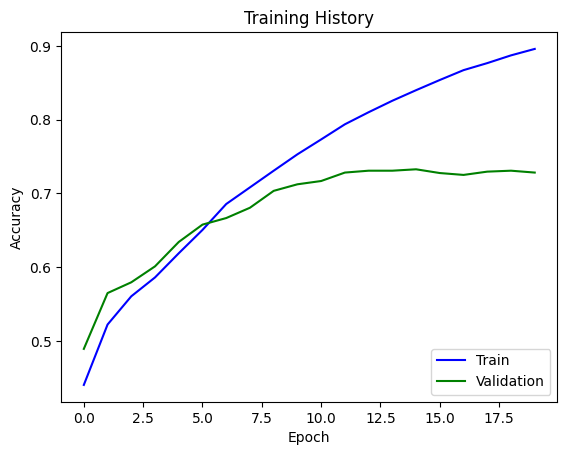

In [50]:
plt.plot(my_summary.history['accuracy'], c="b")
plt.plot(my_summary.history['val_accuracy'], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [52]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC,6)))

Test Accuracy : 0.700208


### 1. Document classification with LSTM network (Binary):


In [53]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.imdb import load_data, get_word_index       # Movie review data.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')                              # Turn the warnings off.
%matplotlib inline

###1.1. Read in the data:


In [54]:
n_words = 3000                                        # Size of the vocabulary.
(X_train, y_train), (X_test, y_test) = load_data(num_words = n_words)
n_train_size = X_train.shape[0]

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [55]:
# Number of unique values of y = Number of categories of the newswires.
n_cat = pd.Series(y_train).nunique()
n_cat

2

In [56]:
# Print out an observation (document) contained in X.
# It is encoded as integers (indices).
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [57]:
# Let's check for length of the first 100 documents.
# We notice that the length is not uniform.
print([len(a) for a in X_train[0:100]])

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109, 129, 163, 752, 212, 177, 129, 140, 256, 888, 93, 142, 220, 193, 171, 221, 174, 647, 233, 162, 597, 234, 51, 336, 139, 231, 704, 142, 861, 132, 122, 570, 55, 214, 103, 186, 113, 169, 469, 138, 302, 766, 351, 146, 59, 206, 107, 152, 186, 431, 147, 684, 383, 324, 252, 263, 787, 211, 314, 118, 390, 132, 710, 306, 167, 115, 95, 158, 156, 82, 502, 314, 190, 174, 60, 145, 214, 659, 408, 515, 461, 202, 238, 170, 107, 171]


In [58]:
# Download the dictionary to translate the indices.
my_dict = get_word_index(path='imdb_word_index.json')

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [60]:
my_dict

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [61]:
# Exchange the 'key' and 'value'.
my_dict_inv = {v:k for k,v in my_dict.items()}

In [62]:
# Translate each document.
i_review = 10                                        # Document number that can be changed at will.
review = list(pd.Series(X_train[i_review]).apply(lambda x: my_dict_inv[x]))
print(' '.join(review))

the clear fact entertaining there life back br is and show of performance stars br actors film him many should movie reasons to and reading and are in of scenes and and of and out compared not boss yes to and show its disappointed fact raw to it justice by br of where clear fact many your way and with city nice are is along wrong not as it way she but this anything up haven't been by who of choices br of you to as this i'd it and who of shot you'll to love for and of you it is sequels of little quest are seen watched front chemistry to simply alive of chris being it is say easy and cry in chemistry but and all it maybe this is wing film job live of and relief and level names and and to be and serial and watch is men go this of wing american from and moving is and put this of jerry for places so work and watch and lot br that from sometimes and make department introduced to and from action at turns in low that in gay i'm of chemistry and i i simply alive it is time done inspector to wat

In [63]:
i_review = 74                                        # Document number that can be changed at will.
review = list(pd.Series(X_train[i_review]).apply(lambda x: my_dict_inv[x]))
print(' '.join(review))

the room and chinese could is on just as not of enough for all off to for that hand some in at is and very to and and king this for and busy br and and worth is and for it and this of and say all look there in another film back for  all interesting point time violent they it's they there's if his of how 10 are be and movie going little music by br though thought and family and and players know is ned unfortunate role pace she film is cgi along silly found to them is and gone directing of found it erotic film and were care this of its and haven't subtle to little and and and to if brutal for and story had pretty in long are by br while was least for experience or those more and it's out is should is north and king i i not if is possibly for and better most horrific that's and it turns in normal good br for time sound satire it's girl it turns in and and that some br is time much down and br is playing kill and drinking of you and film sequences what his rate and and run if very to run 

In [64]:
# Padding: newswire lengths are uniformly matched to maxlen.
# Cut away if longer than maxlen and fill with 0s if shorter than maxlen.
X_train = sequence.pad_sequences(X_train, maxlen = 100)
X_test = sequence.pad_sequences(X_test, maxlen = 100)

### definición del modelo

In [65]:
n_neurons = 50                    # Neurons within each memory cell.
n_input = 100                     # Dimension of the embeding space.

In [66]:
# LSTM network model.
my_model = Sequential()
my_model.add(Embedding(n_words, n_input))           # n_words = vocabulary size, n_input = dimension of the embedding space.
my_model.add(LSTM(units=n_neurons, return_sequences=False, input_shape=(None, n_input), activation='tanh'))
my_model.add(Dense(1, activation='sigmoid'))    # Binary output!!!

In [67]:
# View the summary.
my_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 1.5. Define the optimizer and compile:


In [68]:
n_epochs = 5                      # Number of epochs.
batch_size = 50                    # Size of each batch.
learn_rate = 0.002                 # learning rate.

In [69]:
# Optimizer and compilation.
my_optimizer=Adam(learning_rate=learn_rate)
my_model.compile(loss = "binary_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

In [70]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split=0.2, verbose = 1)

Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6786 - loss: 0.5799 - val_accuracy: 0.8174 - val_loss: 0.4022
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8682 - loss: 0.3154 - val_accuracy: 0.8082 - val_loss: 0.4225
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8874 - loss: 0.2714 - val_accuracy: 0.8350 - val_loss: 0.3982
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9136 - loss: 0.2112 - val_accuracy: 0.8430 - val_loss: 0.3976
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9418 - loss: 0.1619 - val_accuracy: 0.8306 - val_loss: 0.4261


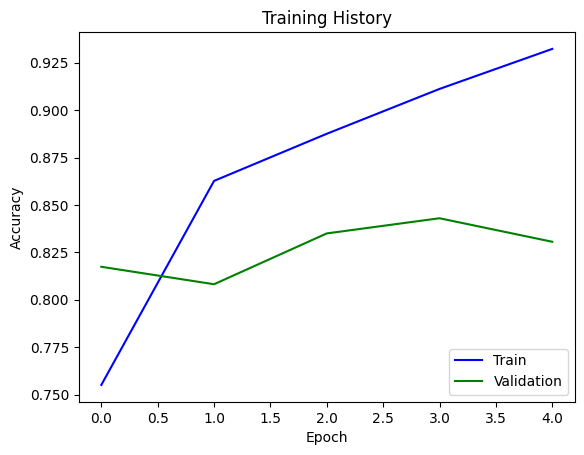

In [71]:
plt.plot(my_summary.history['accuracy'], c="b")
plt.plot(my_summary.history['val_accuracy'], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [73]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC,6)))

Test Accuracy : 0.84044


### 1. Word embedding (Word2Vec):

In [74]:
!pip install gensim


In [75]:
# importar datos google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
import re
import os
import nltk
import urllib
import bs4 as bs
import warnings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
warnings.filterwarnings('ignore')

In [77]:
# Connect to the source.
source = urllib.request.urlopen('https://en.wikipedia.org/wiki/Machine_learning').read()

In [78]:
# Beautiful soup object.
soup = bs.BeautifulSoup(source,'lxml')

In [79]:
# Build a long string.
my_text = ""
for paragraph in soup.find_all('p'):
    my_text += paragraph.text
print(my_text)

Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data and thus perform tasks without explicit instructions.[1] Recently, artificial neural networks have been able to surpass many previous approaches in performance.[2]
ML finds application in many fields, including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine.[3][4] When applied to business problems, it is known under the name predictive analytics. Although not all machine learning is statistically based, computational statistics is an important source of the field's methods.
The mathematical foundations of ML are provided by mathematical optimization (mathematical programming) methods. Data mining is a related (parallel) field of study, focusing on exploratory data analysis (EDA) through unsupervised learning.[6][7]
From a theoretical vie

#### 1.2. Preprocessing of the text data:

In [80]:
my_text = my_text.lower()
my_text = re.sub(r'\[[0-9]*\]',' ', my_text)
my_text = re.sub(r'\W',' ', my_text)
#my_text = re.sub(r'\s+',' ',my_text)
my_text = re.sub(r'\d+',' ',my_text)
my_text = re.sub(r'\s+',' ',my_text)

#### 1.3. Tokenization:

In [81]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
my_sentences = nltk.sent_tokenize(my_text)
my_words_0=[]
for a_sentence in my_sentences:
    my_words_0 += nltk.word_tokenize(a_sentence)
my_words_0 = [a_word for a_word in my_words_0 if len(a_word)>2 ]
my_words_0 = [a_word for a_word in my_words_0 if a_word not in stopwords.words('english')]
my_words_0 = [my_words_0]    # Required by Word2Vec.
len(my_words_0[0])

5017

In [83]:
my_model = Word2Vec(my_words_0, vector_size = 100, min_count=1)
my_words = my_model.wv.key_to_index
len(my_words)

1904

In [84]:
# View the dense vector corresponding to 'machine'.
my_vector = my_model.wv['machine']
print("Length = " + str(my_vector.shape[0]))
print("-"*100)
print(my_vector)

Length = 100
----------------------------------------------------------------------------------------------------
[-1.22138141e-02  7.14758225e-03  5.98261412e-03  4.95656626e-03
  8.14791583e-03 -1.29812481e-02  3.09666106e-03  1.64393056e-02
 -6.34472352e-03 -8.46522860e-03 -3.00899474e-03 -1.42563218e-02
 -5.80751849e-03  8.62593390e-03  5.46722300e-03  3.97791434e-03
  7.53257517e-03  2.80701183e-03 -4.29456262e-03 -8.66519101e-03
  5.75599074e-03 -3.48991947e-03  9.30080563e-03 -1.28812855e-02
  5.96185122e-03  3.00760427e-03 -7.89999776e-03  2.30759208e-04
 -6.05545845e-03  7.78565463e-03  1.55414976e-02 -4.76879394e-03
 -9.38762503e-04 -7.02921208e-03  1.92824309e-03  9.00130440e-03
  7.02332426e-03  2.28622672e-03  7.72129605e-03  1.52108748e-03
  9.19114333e-03 -1.04583828e-02 -1.01974038e-02 -1.72063330e-04
  9.97473020e-04  5.99234039e-03  2.62362859e-03 -1.76447572e-03
  3.73234530e-03  4.00135573e-03  1.02247242e-02 -1.36874923e-02
 -1.88723486e-03  2.99327075e-03 -3.86190

#### 1.6. Most similar words:

In [85]:
my_model.wv.most_similar('learning')

[('detection', 0.4457636773586273),
 ('fold', 0.40077662467956543),
 ('models', 0.40009763836860657),
 ('field', 0.38441842794418335),
 ('may', 0.38371625542640686),
 ('well', 0.36154547333717346),
 ('including', 0.35064128041267395),
 ('machine', 0.3412266671657562),
 ('system', 0.3411473035812378),
 ('signal', 0.33785632252693176)]

In [86]:
my_model.wv.most_similar('artificial')

[('data', 0.41255590319633484),
 ('feature', 0.3674156069755554),
 ('neurons', 0.3577064573764801),
 ('physics', 0.3482356071472168),
 ('application', 0.34519755840301514),
 ('dissimilar', 0.3380415141582489),
 ('regression', 0.3256266117095947),
 ('arthur', 0.31039807200431824),
 ('decisions', 0.3014773428440094),
 ('neuron', 0.29460614919662476)]

In [87]:
# Operation:
# global - cooling + warming = ???
my_model.wv.most_similar(positive=['machine','human'], negative= ['learning'])

[('ambiguous', 0.3314836025238037),
 ('svd', 0.324709415435791),
 ('evidence', 0.31139427423477173),
 ('initial', 0.28084421157836914),
 ('based', 0.269611120223999),
 ('ilp', 0.26876071095466614),
 ('neural', 0.2685428857803345),
 ('examples', 0.26007136702537537),
 ('eda', 0.2577022612094879),
 ('combining', 0.25731468200683594)]

### 2. Using a pre-trained model from Google:

Download ["GoogleNews-vectors-negative300.bin"](https://docs.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download) and uncompress. <br>
**Caution**: Size compressed ~ 1.6 Gb, uncompressed ~ 3.5 Gb.

In [88]:
# Go to the directory where the downloaded file is located.
# os.chdir(r'~~')                # Please, replace the path with your own.

# Load the file.
filename = "/content/drive/MyDrive/Innovacien /03 Proyectos en desarrollo/2024 - Samsung Innovation Campus/2024 Curso AI SIC/Presentaciones y materiales/cap7/GoogleNews-vectors-negative300.bin"
a_model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [89]:
# The most similar words to 'king' or 'kings'.
a_model.most_similar(['king','kings'])

[('princes', 0.6491755247116089),
 ('queen', 0.6316932439804077),
 ('monarch', 0.5960378646850586),
 ('queens', 0.5806739926338196),
 ('monarchs', 0.5739458799362183),
 ('prince', 0.560089647769928),
 ('ruler', 0.5597525835037231),
 ('sultan', 0.5568172931671143),
 ('kings_princes', 0.552049994468689),
 ('emperors', 0.5400723814964294)]

In [90]:
# Operation: queen(queens) - woman(women) + man(men) = ???
a_model.most_similar(positive=['queen','queens','man','men'], negative= ['woman','women'])

[('kings', 0.6578558683395386),
 ('king', 0.6328856945037842),
 ('princes', 0.5353103876113892),
 ('Senti_pocket', 0.512298047542572),
 ('princesses', 0.49174803495407104),
 ('jesters', 0.48247599601745605),
 ('queens_princes', 0.4717157781124115),
 ('princess', 0.46906545758247375),
 ('monarchs', 0.46611741185188293),
 ('prince', 0.4655950367450714)]